<a href="https://colab.research.google.com/github/Tharungowdapr/aiml-basics/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM**

---



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred1 = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred1))


Linear SVM Accuracy: 0.956140350877193


In [6]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred2 = svm_rbf.predict(X_test)
print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred2))


RBF Kernel SVM Accuracy: 0.9736842105263158


In [7]:
print("\nConfusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred2))



Confusion Matrix (RBF):
 [[41  2]
 [ 1 70]]

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
scores = cross_val_score(svm_rbf, X, y, cv=5)
print("Cross-validation mean accuracy:", scores.mean())


Cross-validation mean accuracy: 0.9736376339077782


In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9736263736263737


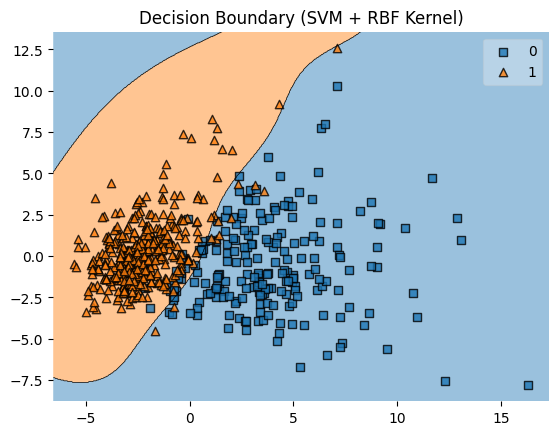

In [10]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2D, y, test_size=0.2, random_state=42)

svm_2D = SVC(kernel='rbf', C=1, gamma='scale')
svm_2D.fit(X_train2, y_train2)

plot_decision_regions(X_2D, y, clf=svm_2D)
plt.title("Decision Boundary (SVM + RBF Kernel)")
plt.show()
